In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error


In [ ]:
airline=pd.read_csv('https://raw.githubusercontent.com/CGeethaka/Airline-Passenger-Satisfaction/refs/heads/main/airline_passenger_satisfaction.csv')   # Load and Inspect Data

In [ ]:
airline.shape

(129880, 24)

In [ ]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

In [ ]:
airline.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied


In [ ]:
airline.isnull().sum() # Data Cleaninig

,0
ID,0
Gender,0
Age,0
Customer Type,0
Type of Travel,0
Class,0
Flight Distance,0
Departure Delay,0
Arrival Delay,393
Departure and Arrival Time Convenience,0


In [ ]:
airline.duplicated().sum()  # Check duplicates

np.int64(0)

In [ ]:
airline.describe()  # Data overview - Descriptive Statistics(count, mean, standard deviation, Min, Max, Q1, Q2, Q3)

,ID,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
count,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,64940.500000,39.427957,1190.316392,14.713713,15.091129,3.057599,2.756876,3.306267,3.252633,2.976925,3.383023,3.441361,3.350878,3.286326,3.204774,3.642193,2.728696,3.358077,3.632114
std,37493.270818,15.119360,997.452477,38.071126,38.465650,1.526741,1.401740,1.266185,1.350719,1.278520,1.287099,1.319289,1.316252,1.313682,1.329933,1.176669,1.329340,1.334049,1.180025
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,32470.750000,27.000000,414.000000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,64940.500000,40.000000,844.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000
75%,97410.250000,51.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000
max,129880.000000,85.000000,4983.000000,1592.000000,1584.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [ ]:
airline['Satisfaction'].value_counts()
airline['Gender'].value_counts()

,count
Gender,
Female,65899
Male,63981


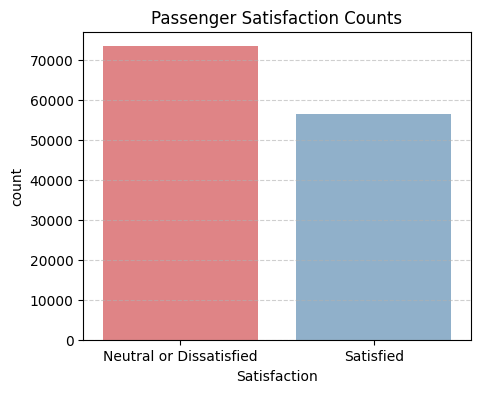

In [ ]:
plt.figure(figsize = (5,4))
sns.countplot(x="Satisfaction", hue="Satisfaction", data = airline, palette="Set1", legend=False, alpha=0.6)
plt.title("Passenger Satisfaction Counts")
plt.grid(axis = 'y', linestyle="--", alpha = 0.6)
plt.show()

### The gender doesn't affect the passenger's satisfaction.

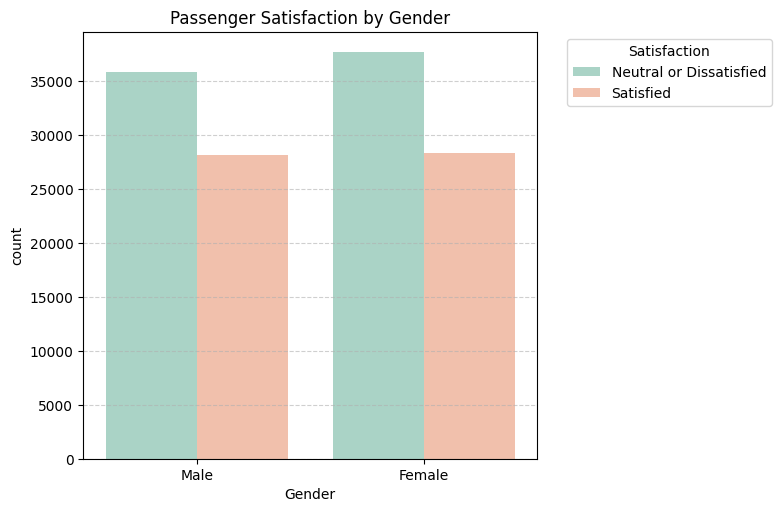

In [ ]:
plt.figure(figsize = (8,5))
sns.countplot(x="Gender", hue="Satisfaction", data = airline, palette="Set2", alpha=0.6)
plt.legend(title="Satisfaction", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.title("Passenger Satisfaction by Gender")
plt.grid(axis = 'y', linestyle="--", alpha=0.6)
plt.show()

### Most of the dissatisfied people has Economy class while most of satisfied people has Business class

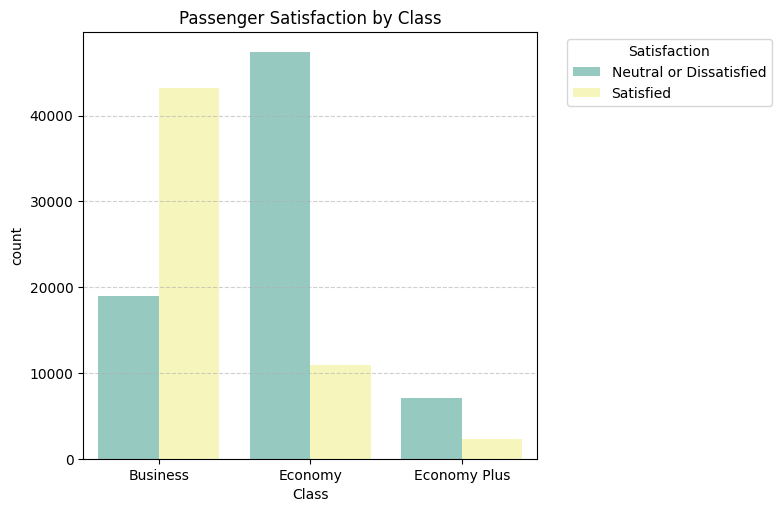

In [ ]:
plt.figure(figsize = (8,5))
sns.countplot(x="Class", hue="Satisfaction", data = airline, palette="Set3")
plt.legend(title="Satisfaction", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.title("Passenger Satisfaction by Class")
plt.grid(axis = 'y', linestyle="--", alpha=0.6)
plt.show()

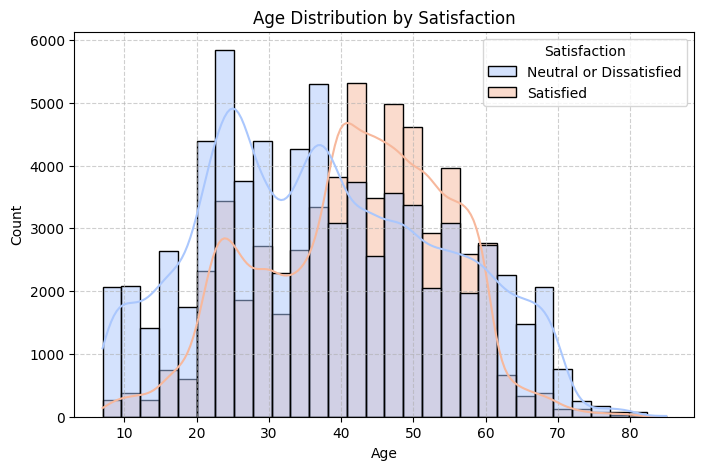

In [ ]:
plt.figure(figsize = (8,5))
sns.histplot(data = airline, x = "Age", hue = "Satisfaction", kde = True, bins = 30, palette = "coolwarm" )
plt.title("Age Distribution by Satisfaction")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

<Figure size 800x500 with 0 Axes>

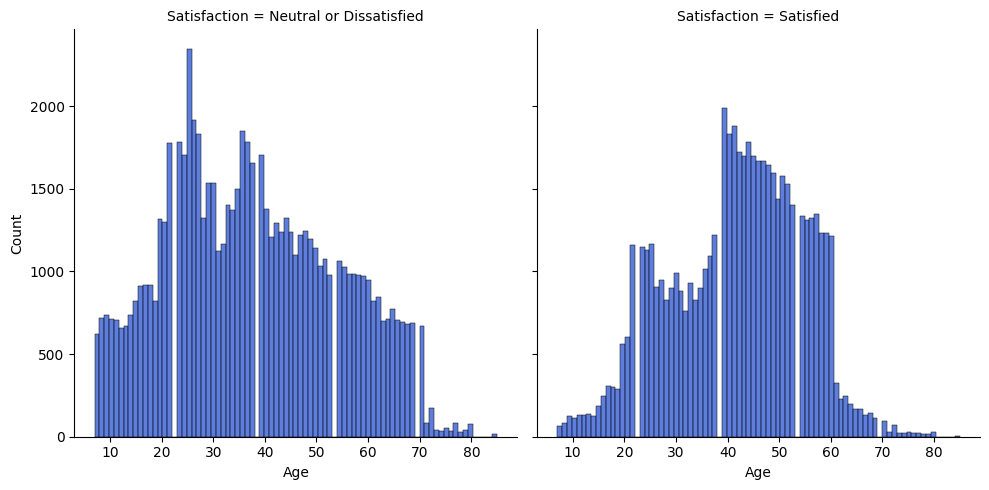

In [ ]:
plt.figure(figsize = (8,5))
sns.displot(data = airline, x = 'Age', col = 'Satisfaction', color = '#2953cf')
plt.show()

### First time customers tend to be dissatisfied little bit more than returning customers.

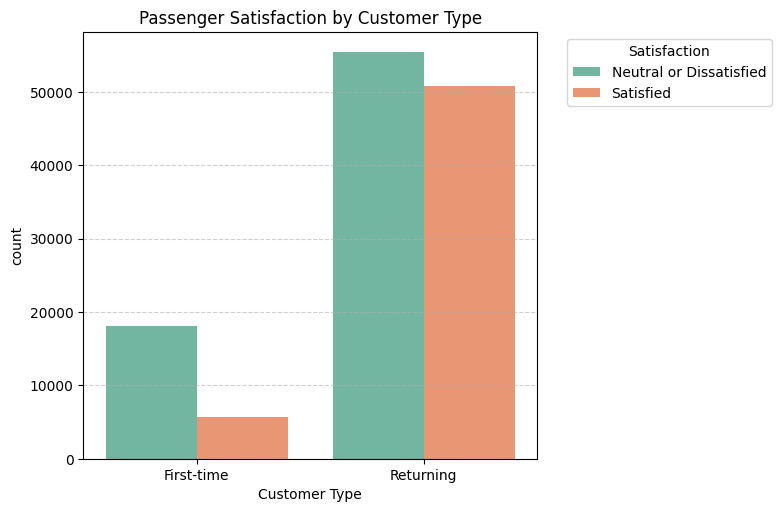

In [ ]:
plt.figure(figsize = (8,5))
sns.countplot(x="Customer Type", hue="Satisfaction", data = airline, palette="Set2")
plt.legend(title="Satisfaction", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.title("Passenger Satisfaction by Customer Type")
plt.grid(axis = 'y',linestyle="--", alpha = 0.6)
plt.show()

### Most of satisfied people has Business type while most of dissatisfied people has Personal type. Business type customers tend to be way more satsfied than Personal type.

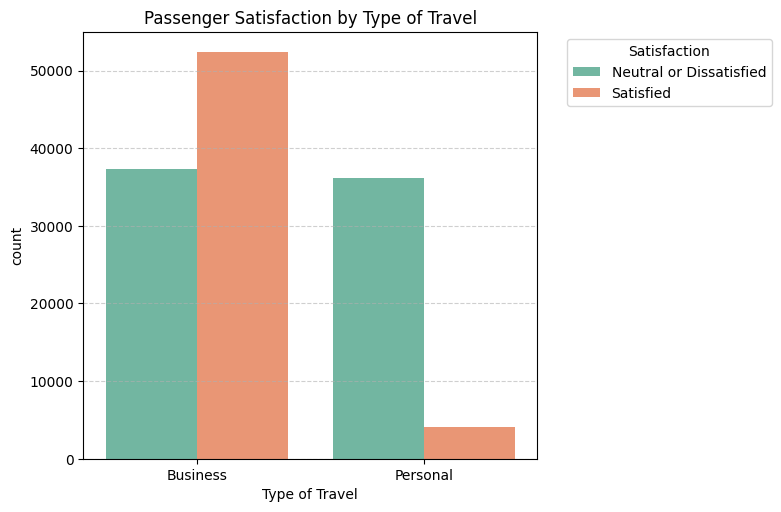

In [ ]:
plt.figure(figsize = (8,5))
sns.countplot(x="Type of Travel", hue="Satisfaction", data = airline, palette="Set2")
plt.legend(title="Satisfaction", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.title("Passenger Satisfaction by Type of Travel")
plt.grid(axis = 'y', linestyle="--", alpha=0.6)
plt.show()

<Figure size 800x500 with 0 Axes>

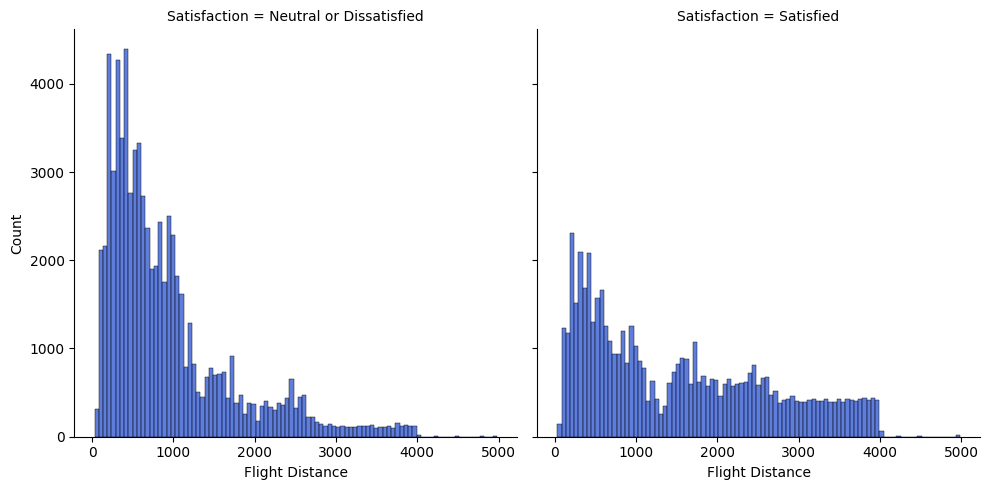

In [ ]:
plt.figure(figsize = (8,5))
sns.displot(data = airline, x = 'Flight Distance', col = 'Satisfaction', color = '#2953cf')
plt.show()

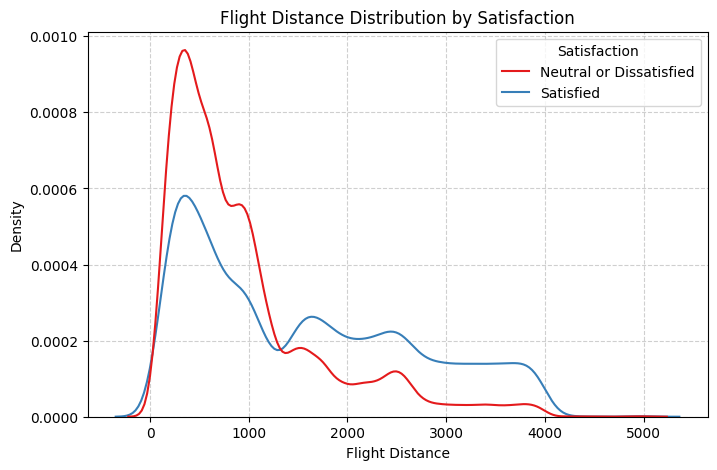

In [ ]:
plt.figure(figsize=(8,5))
sns.kdeplot(data=airline, x="Flight Distance", hue="Satisfaction", fill=False, common_norm=False, palette="Set1")
plt.title("Flight Distance Distribution by Satisfaction")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()